# Lección 3: Modelos de clasificación

Autor: Jorge Castro, Fabricio Quirós Corella

## Tipos de clasificación

Los modelos de **clasificación** buscan predecir una **etiqueta** de clase discreta a partir de variables de entrada discretas o continuas.

### Clasificación binaria

Si contamos con solo 2 clases se dice que es un problema de **clasificación binaria**.  Por ejemplo, si quisiéramos diagnosticar cáncer a partir de imágenes microscópicas de tejidos, o si quisiéramos identificar el género de una persona a partir de una grabación de audio.

![](https://drive.google.com/uc?export=view&id=1oyjGmvsWd9bXwlg_jwo7PZl_ZXAlGHWQ)

![](https://drive.google.com/uc?export=view&id=11aO6Fg7d2M0jdDIHkc71gem2Dqz3oGpQ)

### Clasificación multiclase

Si contamos con más de 2 clases se dice que es un problema de **clasificación multiclase**. Por ejemplo, si quisiéramos detectar diferentes especies de plantas usando fotos de sus hojas.  O si quisiéramos detectar el lenguaje de un texto.

![](https://drive.google.com/uc?export=view&id=1yFFHfyLMEe-Uxv2sO-oph3QLU-rK99Kf)

![](https://drive.google.com/uc?export=view&id=1shqo3y7Nvpyyi5f15g7NTwgWgFkSm5e9)

### Clasificación de multi-etiqueta

Cuando a cada muestra de entrenamiento se le pueden asignar 2 o más clases se dice que es un problema de **clasificación multi-etiqueta**. Por ejemplo, si quisiéramos detectar las diferentes especies de pájaros vocalizando en una grabación de audio.

![](https://drive.google.com/uc?export=view&id=1gDSdMD7M25o_3tRONFPh_ddrOd3apOrz)

**QUIZ DE IDENTIFICACIÓN DEL TIPO DE PROBLEMA**

Si quisiéramos predecir el comportamiento de la bolsa de valores o el crecimiento de una compañía a partir de datos históricos de las mismas estaríamos ante un problema de:

- Regresión
- Clasificación binaria
- Clasificación multiclase
- Ninguna de las anteriores

Si quisieramos desarrollar un modelo para detectar transacciones bancarias fraudulentas, este resolvería una tarea de:

- Regresión
- Clasificación binaria
- Clasificación multiclase
- Clasificación multi-etiqueta

Si quisieramos desarrollar un modelo para identificar la presencia de peatones y automoviles en imágenes de video tomadas en una ciudad, estaríamos ante un problema de:

- Regresión
- Clasificación binaria
- Clasificación multiclase
- Clasificación multi-etiqueta

## Regresión logística

La regresión logística es uno de los modelos de clasificación más simples y ampliamente usados. A través de la regresión logística se obtiene un **límite de decisión** (*decision boundary*) para separar distintas clases. Por ejemplo, si quisiéramos obtener un modelo para clasificar manzanas y limones de acuerdo a su anchura y altura, entonces partiendo de los siguientes datos:






In [ ]:
#Código para cargar el dataset
from google.colab import files
uploaded = files.upload()

Montemos la carpeta asociada a nuestro Google Drive.

In [ ]:
#Código para montar el Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Importamos las librerías necesarias y ejecutamos la lectura del archivo asociado al set de datos de frutas.

In [ ]:
import pandas as pd #biblioteca para lectura de datos estructurados y su manipulación
import numpy as np  #biblioteca para realizar operaciones con vectores y matrices
import matplotlib.pyplot as plt #biblioteca para visualización de datos

filepath = '/content/drive/MyDrive/MachineLearning/datasets/fruits.csv'
ds = pd.read_csv(filepath, header=0)

In [ ]:
#Revisión de aspectos generales del dataframe
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
#Explorar el set de datos como un dataframe
ds.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
#Seleccionar solo manzanas y limones
ds = ds.loc[(ds['fruit_name'] == 'apple') | (ds['fruit_name'] == 'lemon')]

In [ ]:
#Explorar el set de datos que contiene solo observacions de manzanas y limones
ds.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
# Desplegar las dimensiones del nuevo dataframe
ds.shape

(35, 7)

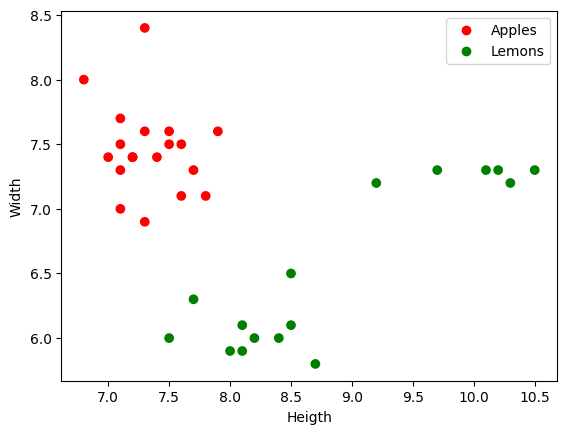

In [ ]:
#Visualizacion de los datos
colors = {'apple':'red', 'mandarin':'gold', 'lemon':'green', 'orange':'orange'}
plt.scatter(ds['height'], ds['width'], c=ds['fruit_name'].map(colors), label=ds['fruit_name'].map(colors))
plt.xlabel('Heigth')
plt.ylabel('Width')
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in ['red','green']]
plt.legend(handlelist,['Apples','Lemons'])
plt.show()

La regresión logística busca la ecuación de la línea que mejor separe las clases (manzanas y limones) y revisamos la correspondiente asignación según el modelo:

In [ ]:
from sklearn.linear_model import LogisticRegression
logRegBin = LogisticRegression()

x_bin = ds[['height','width']].values
y_bin = ds[['fruit_name']].values
logRegBin = logRegBin.fit(x_bin, np.ravel(y_bin))
print(logRegBin.classes_)

['apple' 'lemon']


![](https://drive.google.com/uc?export=view&id=1rOScFGR1FKvEzBkC_UOgDtn7l5VZYBl9)




Ahora, a modo de ejemplo, ¿qué ocurre si quisiéramos realizar una predicción de una nueva fruta con 9 cm de altura y 7 cm de ancho?

In [ ]:
fruit_dims = [[9,7]] # ¿Se clasificaría como una manzana o un limón?
print(logRegBin.predict(fruit_dims))

['lemon']


De igual forma, si obtenemos una nueva fruta con 7 cm de altura y 8 cm de ancho, ¿cómo debería clasificarse?

In [ ]:
fruit_dims = [[7,8]] # ¿Se clasificaría como una manzana o un limón?
print(logRegBin.predict(fruit_dims))

['apple']


No obstante, nótese que este segundo punto se encuentra más alejado del límite de decisión, así que comprobamos la probabilidad de pertenencia a su respectiva clase (**clase manzana, clase 0 o clase negativa**) es más alta que la del primer punto con respecto a su clase (**clase limón, clase 1 o clase positiva**).

In [ ]:
print('Probabilidad de pertenencia del primer punto a clase limón:', logRegBin.predict_proba([[9,7]])[0][1])
print('Probabilidad de pertenencia del segundo punto a clase manzana:', logRegBin.predict_proba([[7,8]])[0][0])

Probabilidad de pertenencia del primer punto a clase limón: 0.8156289973900626
Probabilidad de pertenencia del segundo punto a clase manzana: 0.9827032544525907


### Regresión logística polinomial

Al igual que con los modelos de regresión, podemos aumentar la complejidad del modelo de regresión logística para aumentar su desempeño en la clasificación. De esta forma, los límites de decisión a obtener pueden ser más flexibles que simples líneas.

In [ ]:
#Regresión polinomial
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

#Transformación de la entrada al grado del polinomio de interés
degree = 4
x_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x_bin)

#Ejecución del modelo de regresión logística polinomial
logRegPol = LogisticRegression(max_iter=800) #max_iter=100
logRegPol = logRegPol.fit(x_pol, np.ravel(y_bin))

Ahora, comprobamos nuevamente la asignación de clases para el modelo de regresión logística polinomial.

In [ ]:
print(logRegPol.classes_)

['apple' 'lemon']


Efectuamos la predicción de la nueva fruta con 9 cm de altura y 7 cm de ancho, pero esta vez utilizando el modelo de regresión logística polinomial, para ello hay que aplicar la transformación polinomial de los datos a estimar.

In [ ]:
fruit_dims = [[9,7]]
fruit_dims_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(fruit_dims)
print(logRegPol.predict(fruit_dims_pol))

['lemon']


Luego, revisamos la probabilidad de pertenencia de esta nueva entrada con respecto a las dos clases en estudio.

In [ ]:
print('Probabilidad de pertenencia del primer punto a clase manzana:', logRegPol.predict_proba(fruit_dims_pol)[0][0])
print('Probabilidad de pertenencia del primer punto a clase limón:', logRegPol.predict_proba(fruit_dims_pol)[0][1])

Probabilidad de pertenencia del primer punto a clase manzana: 3.552713678800501e-15
Probabilidad de pertenencia del primer punto a clase limón: 0.9999999999999964


Ahora, hacemos la estimación para una nueva fruta con 7 cm de altura y 8 cm de ancho.

In [ ]:
fruit_dims = [[7,8]]
fruit_dims_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(fruit_dims)
print(logRegPol.predict(fruit_dims_pol))

['apple']


Verificamos la probabilidad de pertenencia a ambas clases para la segunda entrada nueva.

In [ ]:
print('Probabilidad de pertenencia del segundo punto a clase manzana:', logRegPol.predict_proba(fruit_dims_pol)[0][0])
print('Probabilidad de pertenencia del segundo punto a clase limón:', logRegPol.predict_proba(fruit_dims_pol)[0][1])

Probabilidad de pertenencia del segundo punto a clase manzana: 1.0
Probabilidad de pertenencia del segundo punto a clase limón: 3.5065750691957774e-28


### Regresión logística multiclase

Suponiendo que quisiéramos **clasificar múltiples frutas** en lugar del caso binario; es decir, manzanas, limones, mandarinas y naranjas:

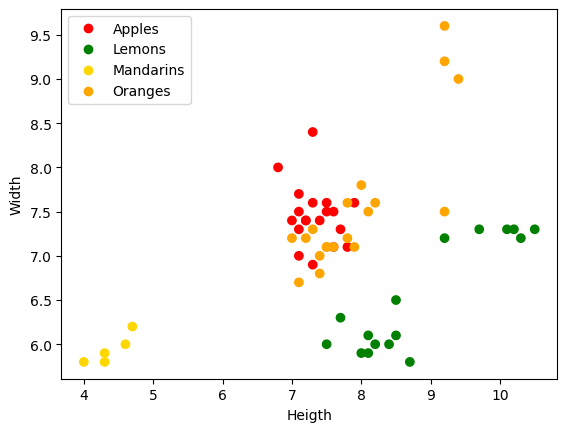

In [ ]:
#Lectura del dataframe original
ds = pd.read_csv(filepath, header=0)
x_mult = ds[['height','width']].values #Nuevo arreglo de datos con todas las observaciones
y_mult = ds[['fruit_name']].values #Obtenemos múltiples clases

#Visualización de los datos
plt.scatter(ds['height'], ds['width'], c=ds['fruit_name'].map(colors), label=ds['fruit_name'].map(colors))

#Ejes y leyendas
plt.xlabel('Heigth')
plt.ylabel('Width')
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in ['red','green','gold','orange']]
plt.legend(handlelist,['Apples','Lemons','Mandarins','Oranges'])
plt.show()

Obsérvese que deberíamos obtener múltiples límites de decisión para separar las diferentes clases (frutas). Un enfoque común para realizar esta tarea se conoce como **regresión logística de uno contra el resto** (*one-vs-rest*) y consiste en aplicar una regresión logistica binaria a cada clase con respecto al resto de clases.

![](https://drive.google.com/uc?export=view&id=1QVo0eZ2igPQXdIymxzpWqlXroSgCMh4l)

En la función `LogisticRegression()` podemos escoger el enfoque de uno contra el resto para hacer clasificación multiclase estableciendo el parámetro `multi_class='ovr'`, donde revisamos la asignación de clases hecha por el modelo.

In [ ]:
logRegOvr = LogisticRegression(multi_class='ovr', max_iter=200)
logRegOvr = logRegOvr.fit(x_mult, np.ravel(y_mult))
print(logRegOvr.classes_)

['apple' 'lemon' 'mandarin' 'orange']


![](https://drive.google.com/uc?export=view&id=10f7MP7FHplYOqzh_CbcPzdKDbXLY4bPK)



También podemos seleccionar otro enfoque más avanzado llamado regresión multinomial estableciendo `multi_class='multinomial'`, donde de igual forma verificamos la asignación de las múltiples etiquetas a estimar.

In [ ]:
logRegMultinom = LogisticRegression(multi_class='multinomial', max_iter=200)
logRegMultinom = logRegMultinom.fit(x_mult, np.ravel(y_mult))
print(logRegMultinom.classes_)

['apple' 'lemon' 'mandarin' 'orange']


![](https://drive.google.com/uc?export=view&id=1Ol1K0unhfDhC6KBa0n5KqCEWV71BtNCm)

Así mismo verificaremos la probabilidad de pertenencia de nuevos puntos con las distintas clases asociadas, tomemos el ejemplo de nueva fruta con 7 cm de altura y 8 cm de ancho.

In [ ]:
print('Dimensiones de la nueva fruta para el modelo OvR:', fruit_dims)
print('Probabilidad de pertenencia de la nueva fruta a la clase manzana:', logRegOvr.predict_proba(fruit_dims)[0][0])
print('Probabilidad de pertenencia de la nueva fruta a la clase limón:', logRegOvr.predict_proba(fruit_dims)[0][1])
print('Probabilidad de pertenencia de la nueva fruta a la clase mandarina:', logRegOvr.predict_proba(fruit_dims)[0][2])
print('Probabilidad de pertenencia de la nueva fruta a la clase naranja:', logRegOvr.predict_proba(fruit_dims)[0][3])

Dimensiones de la nueva fruta para el modelo OvR: [[7, 8]]
Probabilidad de pertenencia de la nueva fruta a la clase manzana: 0.5431378464980868
Probabilidad de pertenencia de la nueva fruta a la clase limón: 0.004079043993384812
Probabilidad de pertenencia de la nueva fruta a la clase mandarina: 0.015320723729328224
Probabilidad de pertenencia de la nueva fruta a la clase naranja: 0.43746238577920005


Ejecutamos las líneas de código de la celda anterior, pero esta vez utilizando el modelo de regresión logística multinomial.

In [ ]:
print('Dimensiones de la nueva fruta para el modelo Multinomial:', fruit_dims)
print('Probabilidad de pertenencia de la nueva fruta a la clase manzana:', logRegMultinom.predict_proba(fruit_dims)[0][0])
print('Probabilidad de pertenencia de la nueva fruta a la clase limón:', logRegMultinom.predict_proba(fruit_dims)[0][1])
print('Probabilidad de pertenencia de la nueva fruta a la clase mandarina:', logRegMultinom.predict_proba(fruit_dims)[0][2])
print('Probabilidad de pertenencia de la nueva fruta a la clase naranja:', logRegMultinom.predict_proba(fruit_dims)[0][3])

Dimensiones de la nueva fruta para el modelo Multinomial: [[7, 8]]
Probabilidad de pertenencia de la nueva fruta a la clase manzana: 0.7304366506548509
Probabilidad de pertenencia de la nueva fruta a la clase limón: 0.002158997864894743
Probabilidad de pertenencia de la nueva fruta a la clase mandarina: 0.007246033805932
Probabilidad de pertenencia de la nueva fruta a la clase naranja: 0.26015831767432224


## Medición del desempeño de un modelo de clasificación

Existen muchas métricas o formas de evaluar la bondad de un modelo predictivo de clasificación, pero tal vez la más común es la **exactitud** (*accuracy*). La exactitud de clasificación es el porcentaje de ejemplos correctamente clasificados del total de predicciones hechas. Matemáticamente, se puede definir a partir de:

- **Verdaderos positivos (VP)**: observaciones clasificadas correctamente como pertenecientes a la clase positiva.
- **Verdaderos negativos (VN)**: observaciones clasificadas correctamente como pertenecientes a la clase negativa
- **Falsos positivos (FP)**: observaciones clasificadas erróneamente como pertenecientes a la clase positiva.
- **Falsos negativos (FN)**: observaciones clasificadas erróneamente como pertenecientes a la clase negativa.

como:

$\frac{VP + VN}{VP + VN + FP + FN}$

En otras palabras, cantidad de predicciones correctas entre cantidad de predicciones realizadas.

Ya sea en su versión lineal o polinomial, el modelo binario o multi-clase de regresión logística implementa esta métrica de la exactitud media en el set dato de datos y de etiquetas.



In [ ]:
print('Exactitud media del modelo de regresión logística para dos frutas:',logRegBin.score(x_bin, y_bin))
print('Exactitud media de la regresión logística polinomial para dos frutas:',logRegPol.score(x_pol, y_bin))

Exactitud media del modelo de regresión logística para dos frutas: 1.0
Exactitud media de la regresión logística polinomial para dos frutas: 1.0


In [ ]:
print('Exactitud media de la regresión logística multiclase uno contra el resto:', logRegOvr.score(x_mult, y_mult))
print('Exactitud media de la regresión logística multiclase multinomial:', logRegMultinom.score(x_mult, y_mult))

Exactitud media de la regresión logística multiclase uno contra el resto: 0.7796610169491526
Exactitud media de la regresión logística multiclase multinomial: 0.7966101694915254


A manera de ejemplo, la siguiente visualización ilustra el desempeño de un modelo de regresión logística polinomial multiclase, utilizando distintos grados del polinomio.

![](https://drive.google.com/uc?export=view&id=116c0aAQ5alGql4BO7YenAAWFk1sp65zo)


![](https://drive.google.com/uc?export=view&id=1Z3po9dgzPpayyy_EiRwr5nJWy2zC1xz8)

Estos modelos de regresión logística realizan una clasificación igual o muy similar a simple vista, pero ¿cómo podemos compararlos más objetivamente, en especial cuando se tiene cantidades muy grandes de datos o cuando se usan mucho más de dos predictores?

### Matriz de confusión

La matriz de confusión $M$ nos permite entender con mayor detalle los errores de clasificación que se están cometiendo para cada clase $\vec{c}_i$ perteneciente al vector de clases $\vec{c}$. $M$ presenta $|\vec{c}|$ filas y $|\vec{c}|$ columnas donde $|\vec{c}|$ es la cantidad de clases. La entrada $M_{i,j}$ indica la cantidad de observaciones de la clase $\vec{c}_i$ que fueron clasificadas como clase $\vec{c}_j$. De esta forma, si $i=j$, $M_{i,j}$ indica la cantidad de **verdaderos positivos** obtenidos para la clase $i$. Asimismo, si $i \neq j$, $M_{i,j}$ indica la cantidad de observaciones de la clase $i$ que fueron erróneamente clasificadas como clase $j$.

Por lo tanto, si sumamos todas las entradas $M_{i,j}$ de la fila $i$ en donde $i \neq j$ obtenemos el total de **falsos negativos** para la clase $\vec{c}_i$ y si sumamos todas las entradas $M_{i,j}$ de la columna $j$ en donde $i \neq j$ obtenemos el total de **falsos positivos** para la clase $\vec{c}_j$. Los **verdaderos negativos** para cualquier clase $\vec{c}_k$ se pueden obtener sumando todas las entradas de la matriz $M_{i,j}$ tal que $i \neq k$ y $j \neq k$. En síntesis, las filas de una matriz de confusión hacen referencia a las verdaderas clases de cada observación y las columnas a las predicciones hechas por el clasificador.

In [ ]:
#Obtención de la matriz de confusión usando el paquete metrics de la biblioteca sklearn
from sklearn import metrics

#Impresión básica en pantalla
predOvr = logRegOvr.predict(x_mult)
cmOvr = metrics.confusion_matrix(y_mult, predOvr)
print(cmOvr)

[[15  0  0  4]
 [ 0 16  0  0]
 [ 0  0  5  0]
 [ 8  1  0 10]]


In [ ]:
#Impresión CM con nombres de filas y columnas
dfcmOvr = pd.DataFrame(cmOvr)
dfcmOvr.columns = logRegOvr.classes_
dfcmOvr.index = logRegOvr.classes_
print(dfcmOvr)

          apple  lemon  mandarin  orange
apple        15      0         0       4
lemon         0     16         0       0
mandarin      0      0         5       0
orange        8      1         0      10


In [ ]:
#Impresión CM con nombres de filas y columnas
predMultinom = logRegMultinom.predict(x_mult)
cmMultinom = metrics.confusion_matrix(y_mult, predMultinom)
dfcmMultinom = pd.DataFrame(cmMultinom)
dfcmMultinom.columns =logRegMultinom.classes_
dfcmMultinom.index =logRegMultinom.classes_
print(dfcmMultinom)

          apple  lemon  mandarin  orange
apple        15      0         0       4
lemon         0     16         0       0
mandarin      0      0         5       0
orange        8      0         0      11


**QUIZ DESEMPEÑO DE MODELOS DE CLASIFICACIÓN**

¿Si quisiera comparar el desempeño de dos clasificadores para la tarea de predecir $y$ usando los predictores $a$,$b$,$c$ y $d$ cuál sería la mejor o mejores opciones?
1. Generar un gráfico con limites de decisión
2. Generar una matriz de confusión
3. Obtener la exactitud de ambos
4. Obtener el $R^2$ de ambos
5. La 2 y la 3
6. La 1 y la 3




Supongamos que desarrollamos un modelo de clasificación para predecir si un tumor es benigno o maligno basándonos en cinco variables independientes con valores continuos. Tomando en cuenta que los falsos negativos (diagnosticar un tumor como benigno cuando en realidad es maligno) son mucho menos deseables que los falsos positivos ¿Cuál sería la mejor forma de medir el desempeño del modelo de acuerdo a lo que hemos estudiado hasta el momento?

1. Generar una matriz de confusión
2. Obtener la exactitud del modelo
3. Generar un gráfico con los limites de decisión
4. Obtener el $R^2$ del modelo

## Modelos adicionales

Existen otros modelos de clasificación más complejos como:
1. Algoritmo del k-ésimo vecino más cercano (kNN)
2. Máquinas de soporte vectorial (SVM)
3. Árboles de decisión
4. Bosques aleatorios (Random Forest)
5. Redes neuronales profundas (DNN)

### Los k-ésimo vecinos más cercanos

El método busca el/los punto(s) más cercanos; es decir, el/los vecino(s) más cercano(s) a la hora de predecir o clasificar un nuevo dato.

Se considera como caso elemental el cálculo a partir de 1 vecino cercano. Si es más de 1 vecino, se utiliza la regla del voto, que es un conteo de la cantidad de vecinos cercanos pertenecientes a una clase, o relativos a un valor dada una predicción.

En clasificación binaria y multi-clase, es posible emplear igualmente un algoritmo del k-ésimo vecino más cercano.


In [ ]:
# kNN para clasificación
from sklearn.neighbors import KNeighborsClassifier

# clasificador del k-ésimo vecino más cercano
n_neighbors = 2
neighBin = KNeighborsClassifier(n_neighbors=n_neighbors)

#Seleccionar solo manzanas y limones
ds = ds.loc[(ds['fruit_name'] == 'apple') | (ds['fruit_name'] == 'lemon')]
x = ds[['height','width']].values
y = ds[['fruit_name']].values

#Ajustar el modelo al set de entrenamiento y a sus etiquetas
neighBin = neighBin.fit(x, np.ravel(y))
print(neighBin.predict([[9,7]]))
print(neighBin.predict([[7,8]]))

['lemon']
['apple']


In [ ]:
print(neighBin.classes_) #Observar orden de asignación de clases
print('Probabilidad de pertenencia del primer punto a clase limón:', neighBin.predict_proba([[9,7]])[0][1])
print('Probabilidad de pertenencia del segundo punto a clase manzana:', neighBin.predict_proba([[7,8]])[0][0])

['apple' 'lemon']
Probabilidad de pertenencia del primer punto a clase limón: 1.0
Probabilidad de pertenencia del segundo punto a clase manzana: 1.0


Ahora, procedemos con el caso del clasificador multi-clase utilizando el método de kNNs:

In [ ]:
ds = pd.read_csv(filepath, header=0)
x = ds[['height','width']].values
y = ds[['fruit_name']].values

# clasificador del k-ésimo vecino más cercano
n_neighbors = 4
neighMulti = KNeighborsClassifier(n_neighbors=n_neighbors)
neighMulti = neighMulti.fit(x, np.ravel(y))
print('Training Accuracy: {}'.format(neighMulti.score(x, np.ravel(y))))

Training Accuracy: 0.8305084745762712


In [ ]:
print(neighMulti.classes_)
print('Probabilidad de pertenencia del primer punto a clase manzana:', neighMulti.predict_proba([[9,7]])[0][0])
print('Probabilidad de pertenencia del primer punto a clase limón:', neighMulti.predict_proba([[9,7]])[0][1])
print('Probabilidad de pertenencia del primer punto a clase mandarina:', neighMulti.predict_proba([[9,7]])[0][2])
print('Probabilidad de pertenencia del primer punto a clase naranja:', neighMulti.predict_proba([[9,7]])[0][3])

['apple' 'lemon' 'mandarin' 'orange']
Probabilidad de pertenencia del primer punto a clase manzana: 0.0
Probabilidad de pertenencia del primer punto a clase limón: 0.75
Probabilidad de pertenencia del primer punto a clase mandarina: 0.0
Probabilidad de pertenencia del primer punto a clase naranja: 0.25


In [ ]:
print('Probabilidad de pertenencia del segundo punto a clase manzana:', neighMulti.predict_proba([[7,8]])[0][0])
print('Probabilidad de pertenencia del segundo punto a clase limón:', neighMulti.predict_proba([[7,8]])[0][1])
print('Probabilidad de pertenencia del segundo punto a clase mandarina:', neighMulti.predict_proba([[7,8]])[0][2])
print('Probabilidad de pertenencia del segundo punto a clase naranja:', neighMulti.predict_proba([[7,8]])[0][3])

Probabilidad de pertenencia del segundo punto a clase manzana: 1.0
Probabilidad de pertenencia del segundo punto a clase limón: 0.0
Probabilidad de pertenencia del segundo punto a clase mandarina: 0.0
Probabilidad de pertenencia del segundo punto a clase naranja: 0.0


In [ ]:
#Impresión kNN con nombres de filas y columnas
from sklearn import metrics

predNN = neighMulti.predict(x)
cm = metrics.confusion_matrix(y, predNN)
dfcm = pd.DataFrame(cm)
dfcm.columns = neighMulti.classes_
dfcm.index = neighMulti.classes_
print(dfcm)

          apple  lemon  mandarin  orange
apple        17      0         0       2
lemon         0     16         0       0
mandarin      0      0         5       0
orange        7      1         0      11


La idea es encontrar una cantidad de vecinos donde el conjunto de pruebas entregue el mejor puntaje de precisión de la mano de una precisión del conjunto de entrenamiento buena.

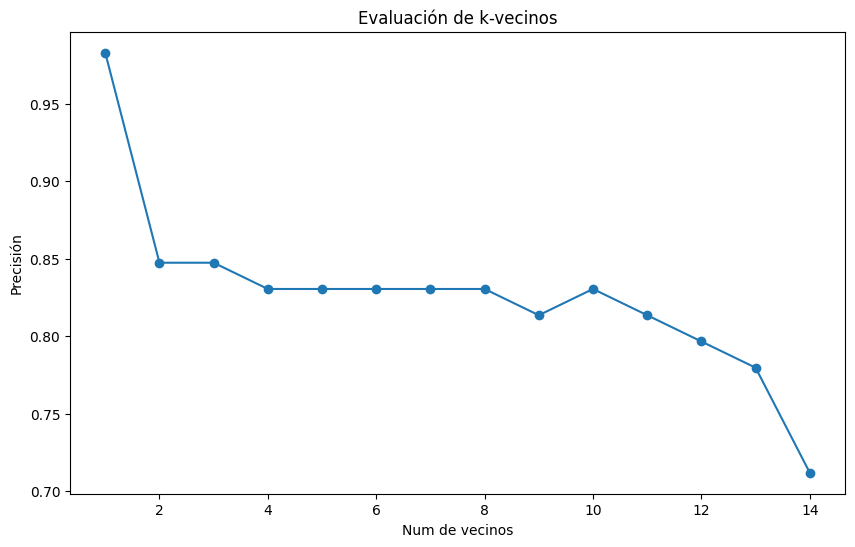

In [ ]:
#entrenamiento de kNN
accs = []

#Calcular la precisión del modelo usando entre 1 y 15 vecinos
for k in range(1,15):
  neigh = KNeighborsClassifier(n_neighbors=k).fit(x, np.ravel(y))

  #para cada valor de vecinos se calcula la suma del cuadrado dentro del clúster
  acc = neigh.score(x, np.ravel(y))
  accs.append(acc)

#trazamos la curva de precision vs la cantidad de vecinos
plt.figure(figsize=[10,6])
plt.title('Evaluación de k-vecinos')
plt.xlabel('Num de vecinos')
plt.ylabel('Precisión')
plt.plot(list(range(1,15)), accs, marker="o")
plt.show()

Un k bajo representa un modelo de alta complejidad, y un k alto, modelo de baja complejidad. Requiere ajuste de dicho valor y de la forma de medir la distancia entre la predicción y los vecinos más cercanos (euclidiana).

Ventajas:
*   Fácil de entender.
*   Generalmente, entrega buenos resultados sin excesivo ajuste.

Desventajas:
*   Se puede volver lento si el conjunto de entrenamiento es muy grande.
*   No brinda buenos resultados cuando la dimensionalidad de los atributos es alta o cuando estos sean cero.

### Clasificador de vector de soporte

Conocido en inglés como el *Support Vector Classifier*, SVC.

Ventajas:

*   Buena precisión.
*   Opera bien con datos pequeños/limpios.

Desventajas:
*   Puede resultar lento con set de datos grandes.
*   No brinda buenos resultados con datos ruidosos.

In [ ]:
#Ejemplo: SVC
from sklearn import svm

#Crear el clasificador de vector de soporte
svcMulti = svm.SVC(degree=2, C=5) #controla el grado de reguralizacion
svcMulti = svcMulti.fit(x, np.ravel(y))

#Determinar el puntaje de accuracy (precision o exactitud)
acc = svcMulti.score(x, np.ravel(y))
print('Acc SVM as multi-class classfier: {}'.format(acc))

Acc SVM as multi-class classfier: 0.8135593220338984


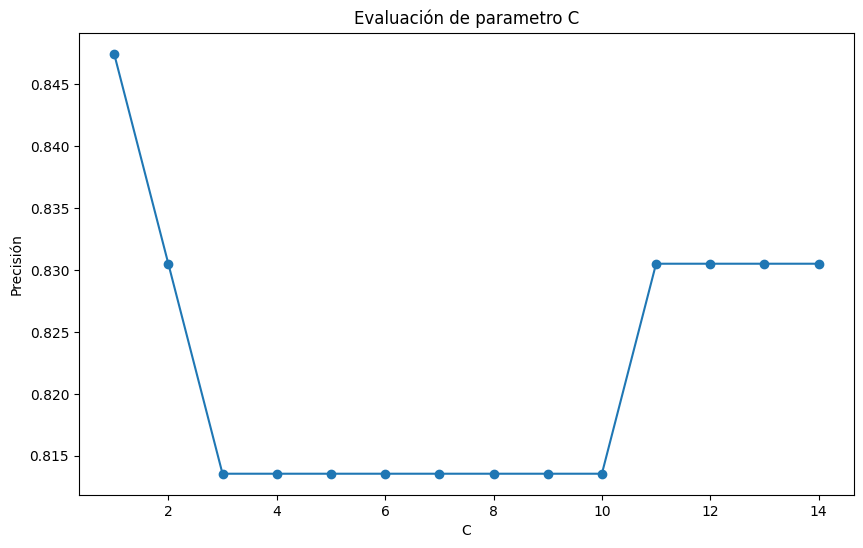

In [ ]:
#entrenamiento de SVC
accs = []

#Calcular la precisión del modelo usando un grado de reg entre 1 y 15
for C in range(1,15):
  svc = svm.SVC(degree=2, C=C).fit(x, np.ravel(y))
  #para cada valor de regularizacion, se calcula la exactitud del modelo
  acc = svc.score(x, np.ravel(y))
  accs.append(acc)

#trazamos la curva de precision vs el valor del parametro C
plt.figure(figsize=[10,6])
plt.title('Evaluación de parametro C')
plt.xlabel('C')
plt.ylabel('Precisión')
plt.plot(list(range(1,15)), accs, marker="o")
plt.show()

## Consideraciones sobre los modelos de clasificación

1. Es importante destacar que en un problema de clasificación las entradas pueden ser continuas, discretas o categóricas pero la variable de respuesta es **categórica**.
2. Dependiendo de la cantidad de categorías (clases) un problema de clasificación se puede considerar binario (2 clases) o multiclase (más de 2 clases). Si varias clases pueden ocurrir simultáneamente para una misma observación se dice que es un problema de clasificación multi-etiqueta
3. La regresión logística es un algoritmo de clasificación y no de regresión a pesar de que contiene la palabra "regresión" en su nombre.
4. Los coeficientes de la regresión logística se pueden obtener a través del algoritmo de optimización de **gradientes descendientes** u otras técnicas de optimización más avanzadas como **gradientes conjugados**, **BFGS** y **L-BFGS**.
5. Para medir el desempeño de un algoritmo de clasificación podemos usar la **exactitud** que nos brinda el porcentaje de observaciones que fueron correctamente clasificadas. Para obtener información más detallada sobre el desempeño del clasificador (especialmente cuando se tienen múltiples clases) se puede obtener la **matriz de confusión** que indica en cuáles clases se cometieron los errores y que tipos de errores fueron (falsos negativos o falsos positivos)
6. Al igual que los modelos de regresión los modelos de clasificación pueden sufrir del problema de **sobreajuste** cuando se aumenta mucho la complejidad de los mismo y/o se entrenan por demasiadas iteraciones.

## Práctica 3

Usando el dataset *obesity_train.csv* y guiándose con la descripción de sus variables en el archivo *obesity_description.txt*:
1. Obtenga un modelo de clasificación que estime el grado de obesidad de una persona (*NObeyesdad*) basado únicamente en atributos de sus hábitos de alimentación. Luego, imprima en pantalla la exactitud del modelo.
2. Obtenga un segundo modelo que estime el grado de obesidad de una persona basado únicamente en atributos relacionados con su condición física. Luego, imprima en pantalla la exactitud del modelo.
3. ¿Cual de los dos modelos logra predecir con mayor exactitud el grado de obesidad de una persona?
4. Imprima en pantalla la matriz de confusión para ambos modelos y responda: ¿Cúal es la categoría de obesidad que presentó más falsos negativos para cada modelo? ¿Cúal es la categoría de obesidad que presentó más falsos positivos para cada modelo?
5. **Opcional:** ¿Cuál fue la categoría que obtuvo una mayor exactitud para cada modelo?

In [ ]:
#Puede realizar su práctica aquí
#/content/drive/MyDrive/MachineLearning/datasets/obesity_train.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/datasets/obesity_train.csv", header=0)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,20.254534,1.569480,41.324558,no,yes,2.392665,1.0,Frequently,no,1.000000,no,0.000000,0.738269,Sometimes,Public_Transportation,Insufficient_Weight
1,Male,36.542885,1.750000,119.434645,yes,yes,2.729890,3.0,Sometimes,no,2.030084,no,0.592607,0.754417,Sometimes,Automobile,Obesity_Type_II
2,Female,26.000000,1.624134,111.531208,yes,yes,3.000000,3.0,Sometimes,no,2.609188,no,0.000000,0.174030,Sometimes,Public_Transportation,Obesity_Type_III
3,Male,22.200779,1.769328,105.000576,yes,yes,2.685484,3.0,Sometimes,no,2.649459,no,1.000000,0.000000,Sometimes,Public_Transportation,Obesity_Type_I
4,Male,17.120699,1.809251,58.968994,yes,yes,2.524428,4.0,Sometimes,no,2.000000,no,2.000000,0.038380,no,Automobile,Insufficient_Weight


In [56]:
# 1) Hábitos alimenticios

# Comentarios tomados de la clase
#Frequent consumption of high caloric food (FAVC),
#Frequency of consumption of vegetables (FCVC), Number of main meals (NCP),
#Consumption of food between meals (CAEC), Consumption of water daily (CH20),
#and Consumption of alcohol (CALC)

x_cat = pd.get_dummies(df[['FAVC', 'CAEC', 'CALC']])
x_num = df[['FCVC', 'NCP', 'CH2O']]

x_eat = pd.concat([x_cat.reset_index(drop=True), x_num], axis=1).values
Y = df[['NObeyesdad']].values

#print(x,Y)
# Note: ravel changes the shape of Y from column to 1d array.
X_train, X_test, y_train, y_test = train_test_split(x_eat, Y.ravel(), test_size=0.2)

In [57]:
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
y_pred = rf1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6242603550295858


In [59]:
# 2) Condición física
# Calories consumption monitoring (SCC), Physical activity frequency (FAF),
# Time using technology devices (TUE), Transportation used (MTRANS)

x_cat = pd.get_dummies(df[['SCC', 'MTRANS']])
x_num = df[['FAF', 'TUE']]
x_phy = pd.concat([x_cat.reset_index(drop=True), x_num], axis=1).values
Y = df[['NObeyesdad']].values

X_train, X_test, y_train, y_test = train_test_split(x_phy, Y.ravel(), test_size=0.2)

In [60]:
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4289940828402367


3) Utilizando un clasificador Random Forest, sin ajustar hyperparámetros, el primer modelo, que se enfoca en hábitos alimenticios, alcanza una exactitud de 0.63, la cuál es superior a la obtenida por el segundo modelo enfocado en condición física, que obtuvo 0.42

In [65]:
# 4) Confussion Matrix
print('Hábitos alimenticios')
y_pred_eat = rf1.predict(x_eat)
cm_eat = metrics.confusion_matrix(Y, y_pred_eat)
dfcm_eat = pd.DataFrame(cm_eat)
dfcm_eat.columns = rf1.classes_
dfcm_eat.index = rf1.classes_
print(dfcm_eat)
print('Condición física')
y_pred_phy = rf2.predict(x_phy)
cm_phy = metrics.confusion_matrix(Y, y_pred_phy)
dfcm_phy = pd.DataFrame(cm_phy)
dfcm_phy.columns = rf1.classes_
dfcm_phy.index = rf1.classes_
print(dfcm_phy)

Hábitos alimenticios
                     Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Insufficient_Weight                  193             18               2   
Normal_Weight                          3            195               7   
Obesity_Type_I                         2             16             245   
Obesity_Type_II                        4              9               2   
Obesity_Type_III                       0              0               7   
Overweight_Level_I                     0             31              14   
Overweight_Level_II                    1             20              16   

                     Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Insufficient_Weight                0                 0                   5   
Normal_Weight                      0                 0                   5   
Obesity_Type_I                     2                 0                   8   
Obesity_Type_II                  210                 0            

In [66]:
# código del prof
FP = cm_eat.sum(axis=0) - np.diag(cm_eat)
print("Falsos Positivos por clase: ",FP, " total: ", FP.sum())
FN = cm_eat.sum(axis=1) - np.diag(cm_eat)
print("Falsos Negativos por clase: ",FN, " total: ", FN.sum())
TP = np.diag(cm_eat)
print("Verdaderos Positivos por clase: ",TP, " total: ", TP.sum())

Falsos Positivos por clase:  [10 94 48  9  1 27 35]  total:  224
Falsos Negativos por clase:  [28 31 40 20  7 53 45]  total:  224
Verdaderos Positivos por clase:  [193 195 245 210 252 182 187]  total:  1464


5) En el modelo de hábitos alimenticios, se obtuvieron 252/253 verdaderos positivos para la obesidad de tipo 3.

En el modelo de condición física, se obtuvieron 251/272 verdaderos positivos para la misma categoría.